# Panagram-like plotting

## Imports and helper functions

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
%matplotlib inline

plt.rcParams['figure.dpi'] = 600

In [3]:
# import plotnine
from plotnine import \
    ggplot, aes, theme, themes, element_blank, element_line, element_text, mapping, \
    geom_point, geom_jitter, geom_line, geom_bar, geom_boxplot, geom_violin, geom_histogram, \
    ggtitle, xlab, ylab, geom_vline, geom_hline, geom_col, \
    scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, \
    scale_color_discrete, scale_fill_manual, scale_fill_hue, scale_fill_gradient, scale_color_manual, scale_color_hue, \
    guides, \
    xlim, ylim
from plotnine.options import figure_size


# plotnine theme
def theme_tufte_func(base_size=19, base_family="sans", rotate=True, figure_size=None):
    ''' Plotnine plotting theme. '''
    thm = themes.theme_bw(base_size=base_size, base_family = base_family) + \
        theme(
            legend_background = element_blank(),
            legend_key = element_blank(),
            panel_background = element_blank(),
            panel_border = element_blank(),
            strip_background = element_blank(),
            plot_background = element_blank(),
            panel_grid = element_blank(),
            axis_line = element_line(colour = "black", size = 1),
            axis_text_y = element_text(colour = "black")
        )

    if rotate:
        thm += theme(axis_text_x=element_text(rotation=45, hjust=1))
    if figure_size is not None:
        thm += theme(figure_size=figure_size)
    return thm


In [4]:
# Reading a file
def fileReader(path):
    ''' Read file from path line-by-line. '''
    with open(path, 'r') as inFile:
        for line in inFile:
            yield line.strip()


## Panagram plot

In [5]:
def panagram_preprocess(path, num_docs, n_bins):
    num_docs_per_pos = list(map(int, list(fileReader(path))))
    positions = len(num_docs_per_pos)

    per_bin_doc_composition_list = []
    bin_space = list(map(int,np.linspace(0, positions, n_bins)))

    for bin_idx, start_end in enumerate(list(zip(bin_space[:-1], bin_space[1:]))):
        bin_start, bin_end = start_end
        doc_count_per_order_in_bin = Counter(num_docs_per_pos[bin_start : bin_end])
        normalized_doc_count_per_order_in_bin = [(order, doc_count_per_order_in_bin[order]/sum(doc_count_per_order_in_bin.values())) for order in range(num_docs + 1) ]
        normalized_doc_count_per_order_in_bin_in_sorted_order_mem_order = sorted(normalized_doc_count_per_order_in_bin, key=lambda x: x[0])   # sorting by order
        per_bin_doc_composition_list.append([bin_idx]+[norm_cnt[1] for norm_cnt in normalized_doc_count_per_order_in_bin_in_sorted_order_mem_order])

    cnames = ['pos'] + list(range(num_docs + 1))
    per_bin_doc_composition_df = pd.DataFrame(per_bin_doc_composition_list, columns=cnames)

    per_bin_doc_composition_df = pd.melt(per_bin_doc_composition_df, id_vars=['pos'], value_vars=cnames[1:])
    per_bin_doc_composition_df.columns = ['bin','Num. Genomes','value']
    per_bin_doc_composition_df['Num. Genomes'] = pd.Categorical(per_bin_doc_composition_df['Num. Genomes'], categories=cnames[:0:-1])
    per_bin_doc_composition_df['Num. Genomes'] = per_bin_doc_composition_df['Num. Genomes'].astype('float64')
    return per_bin_doc_composition_df[per_bin_doc_composition_df['Num. Genomes'] != num_docs]


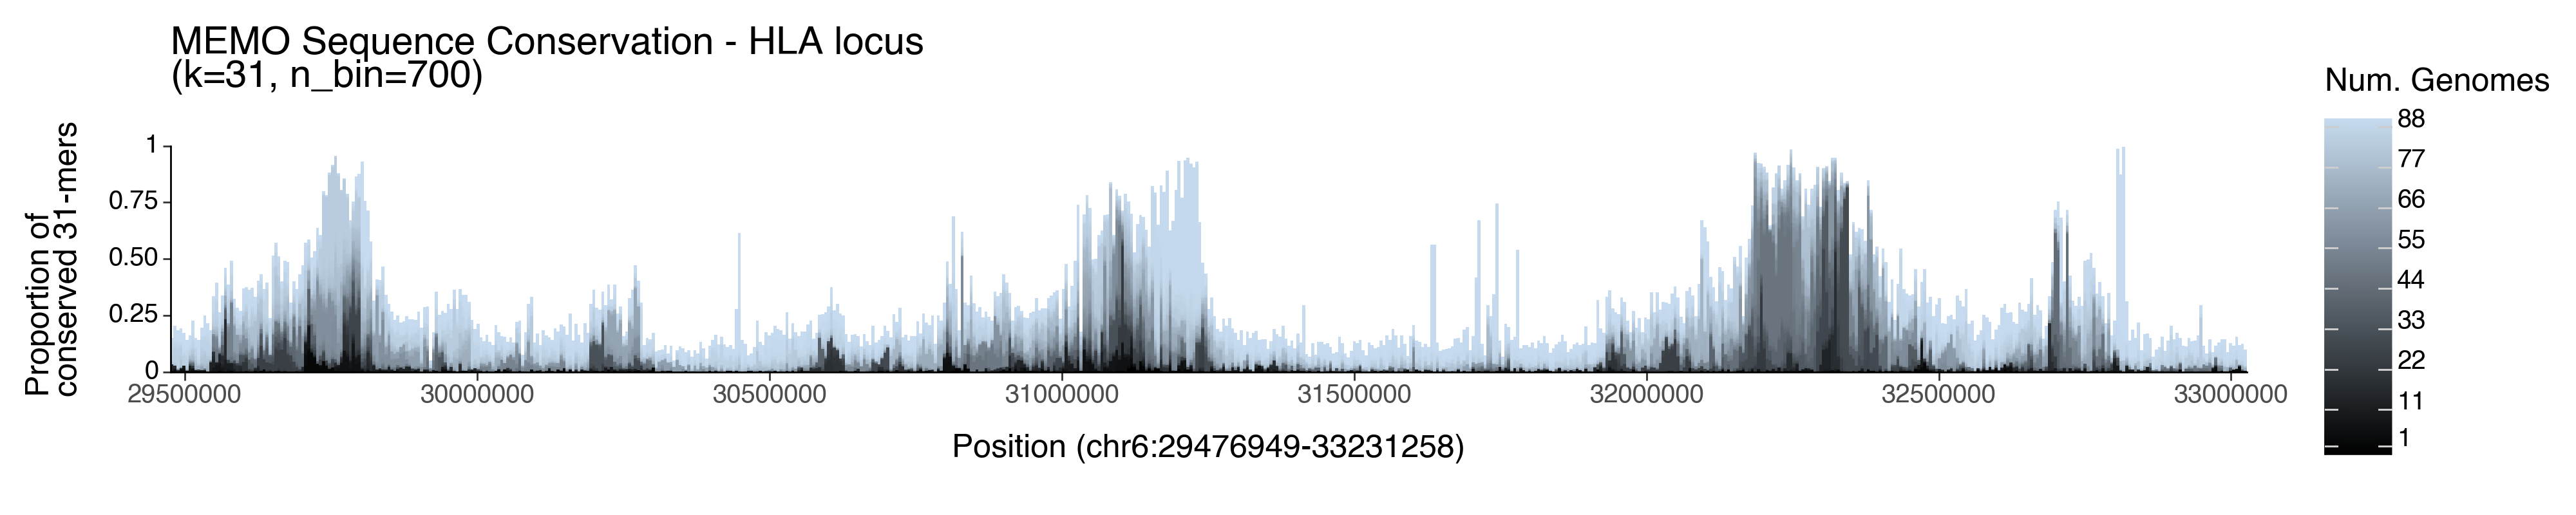

<Figure Size: (2000 x 400)>

In [24]:
################### FULL ###################
path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/memo_hla_conservation.out'
n_bins = 700
num_docs = 89
data = panagram_preprocess(path, num_docs, n_bins)

breaks = [1, 11, 22, 33, 44, 55, 66, 77, 88]

# plot MEM-version of Panagram
(
    ggplot(data, aes(x='bin', y='value', fill='Num. Genomes')) +
    geom_bar(stat="identity", width=1) +
    ggtitle("MEMO Sequence Conservation - HLA locus\n(k=31, n_bin=700)") +
    xlab("Position (chr6:29476949-33231258)") +
    ylab("Proportion of\nconserved 31-mers") +
    scale_x_continuous(
        breaks=np.linspace(0+4.297913597971398, 699-5.828128204650122, 8),
        labels=list(range(29_500_000, 33_200_000, 500_000)),
        expand=(0,0)
    ) +
    scale_y_continuous(
        breaks=np.linspace(0,1,5),
        labels=['0','0.25','0.50','0.75', '1'],
        expand=(0,0),
        limits=(0,1)
    ) +
    scale_fill_gradient(low='#000000', high='#c6dbef',
                        breaks=breaks,
                        labels=breaks,
                        limits=(1,88)
                       ) +
    theme_tufte_func(base_size=18, rotate=False, figure_size=[20,4])
)


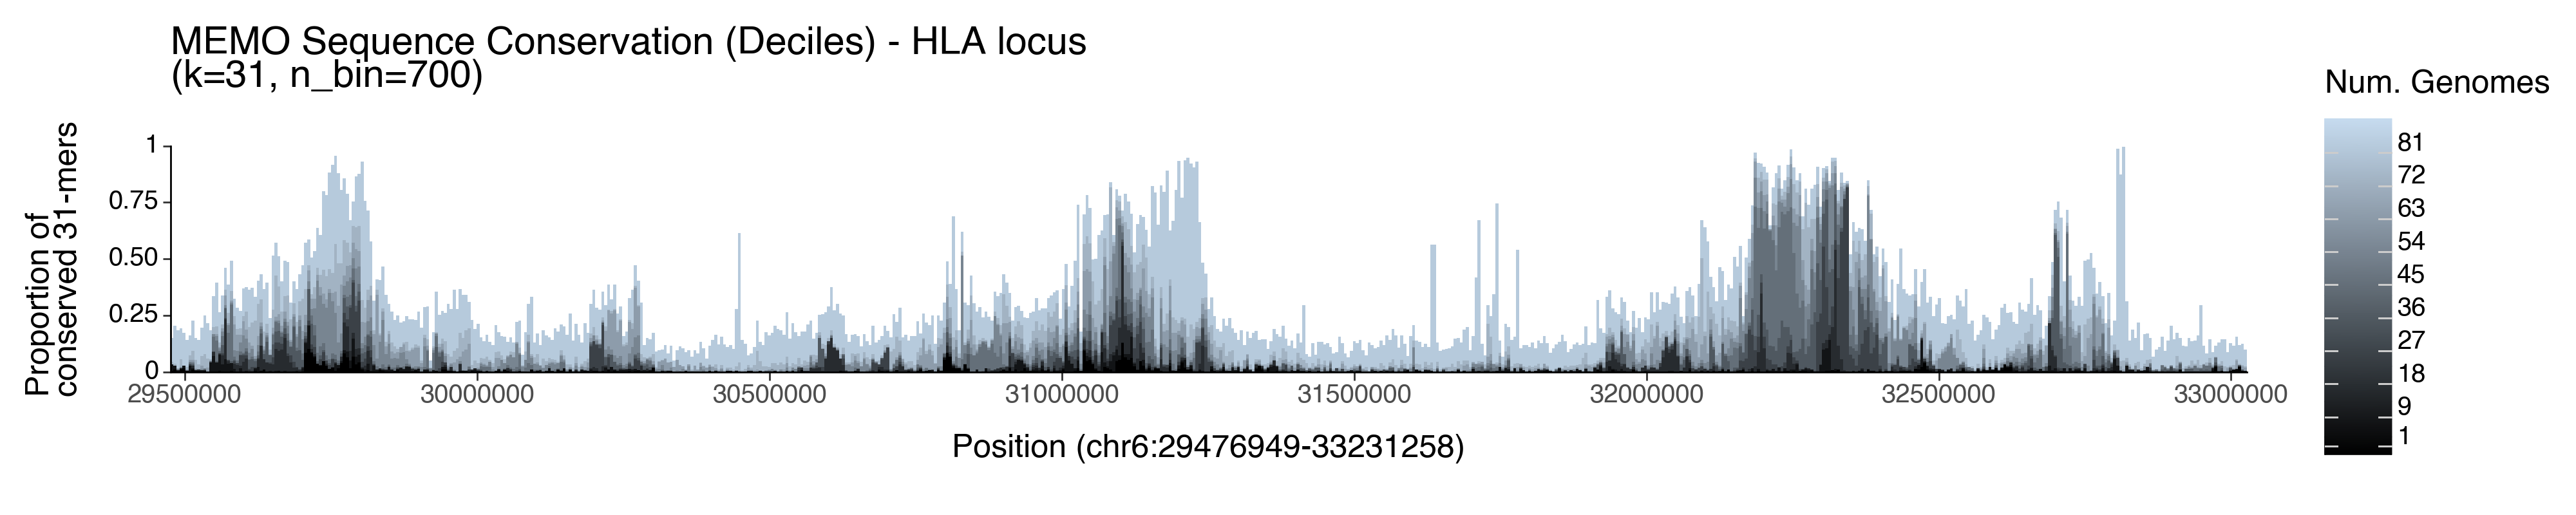

<Figure Size: (2000 x 400)>

In [25]:
################### DECILES ###################
path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/memo_hla_conservation.deciles.out'
n_bins = 700
num_docs = 89
data = panagram_preprocess(path, num_docs, n_bins)

# [1, 11, 22, 33, 44, 55, 66, 77, 88]
breaks = [1, 9, 18, 27, 36, 45, 54, 63, 72, 81]

# plot MEM-version of Panagram
(
    ggplot(data, aes(x='bin', y='value', fill='Num. Genomes')) +
    geom_bar(stat="identity", width=1) +
    ggtitle("MEMO Sequence Conservation (Deciles) - HLA locus\n(k=31, n_bin=700)") +
    xlab("Position (chr6:29476949-33231258)") +
    ylab("Proportion of\nconserved 31-mers") +
    scale_x_continuous(
        breaks=np.linspace(0+4.297913597971398, 699-5.828128204650122, 8),
        labels=list(range(29_500_000, 33_200_000, 500_000)),
        expand=(0,0)
    ) +
    scale_y_continuous(
        breaks=[0, 0.25, 0.50, 0.75, 1],
        labels=['0', '0.25','0.50','0.75', '1'],
        expand=(0,0),
        limits=(0,1)
    ) +
    scale_fill_gradient(low='#000000', high='#c6dbef',
                        breaks=breaks,
                        labels=breaks,
                        limits=(1,88)
                       ) +
    #geom_vline(xintercept=484.41289728682428643992, color='red') +
    #geom_vline(xintercept=633.57483361119183317089, color='red') +  
    theme_tufte_func(base_size=18, rotate=False, figure_size=[20,4])
)


## Subset region

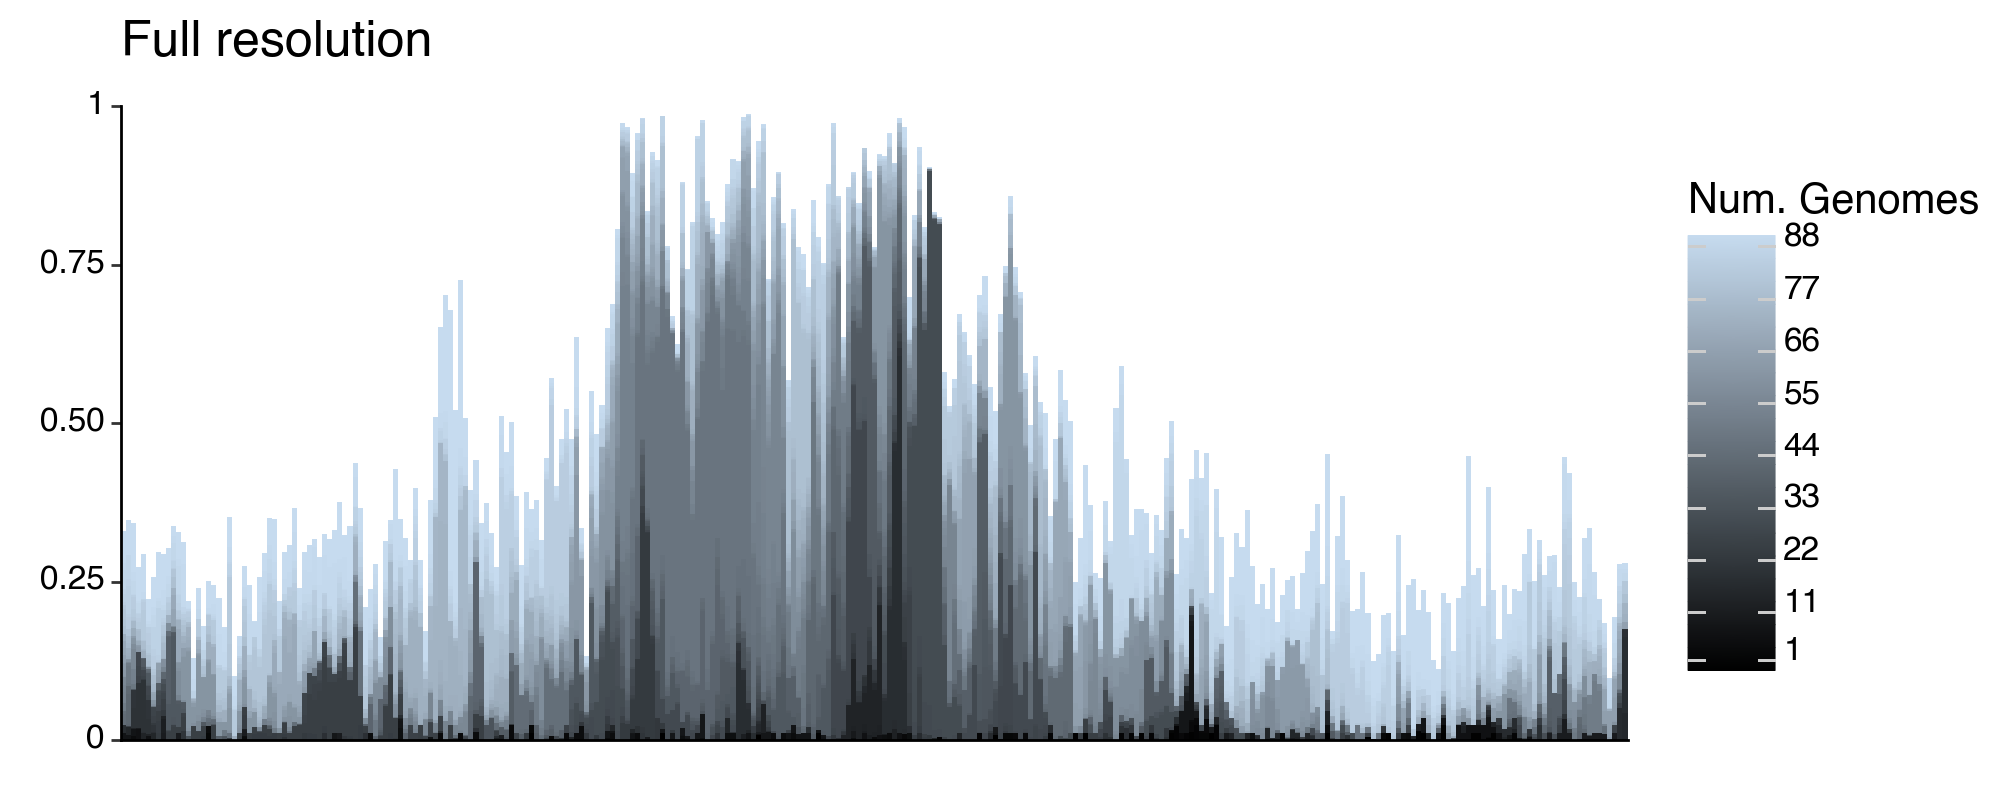

<Figure Size: (1000 x 400)>

In [13]:
################### FULL ###################
path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/tmp/memo_hla_subset_conservation.bed'
n_bins = 300
num_docs = 89
data = panagram_preprocess(path, num_docs, n_bins)

breaks = [1, 11, 22, 33, 44, 55, 66, 77, 88]

# plot MEM-version of Panagram
(
    ggplot(data, aes(x='bin', y='value', fill='Num. Genomes')) +
    geom_bar(stat="identity", width=1) +
    #ggtitle("MEMO Sequence Conservation - HLA locus\n(k=31, n_bin=700)") +
    ggtitle("Full resolution") +
    xlab("") +
    ylab("") +
    scale_x_continuous(
        breaks=[],
        labels=[],
        expand = (0,0)
    ) +
    scale_y_continuous(
        breaks=[0, 0.25, 0.50, 0.75, 1],
        labels=['0', '0.25','0.50','0.75', '1'],
        expand=(0,0),
        limits=(0,1)
    ) +
    scale_fill_gradient(low='#000000', high='#c6dbef',
                        breaks=breaks,
                        labels=breaks,
                        limits=(1,88)
                       ) +
    theme_tufte_func(base_size=15, rotate=False, figure_size=[10,4])
)


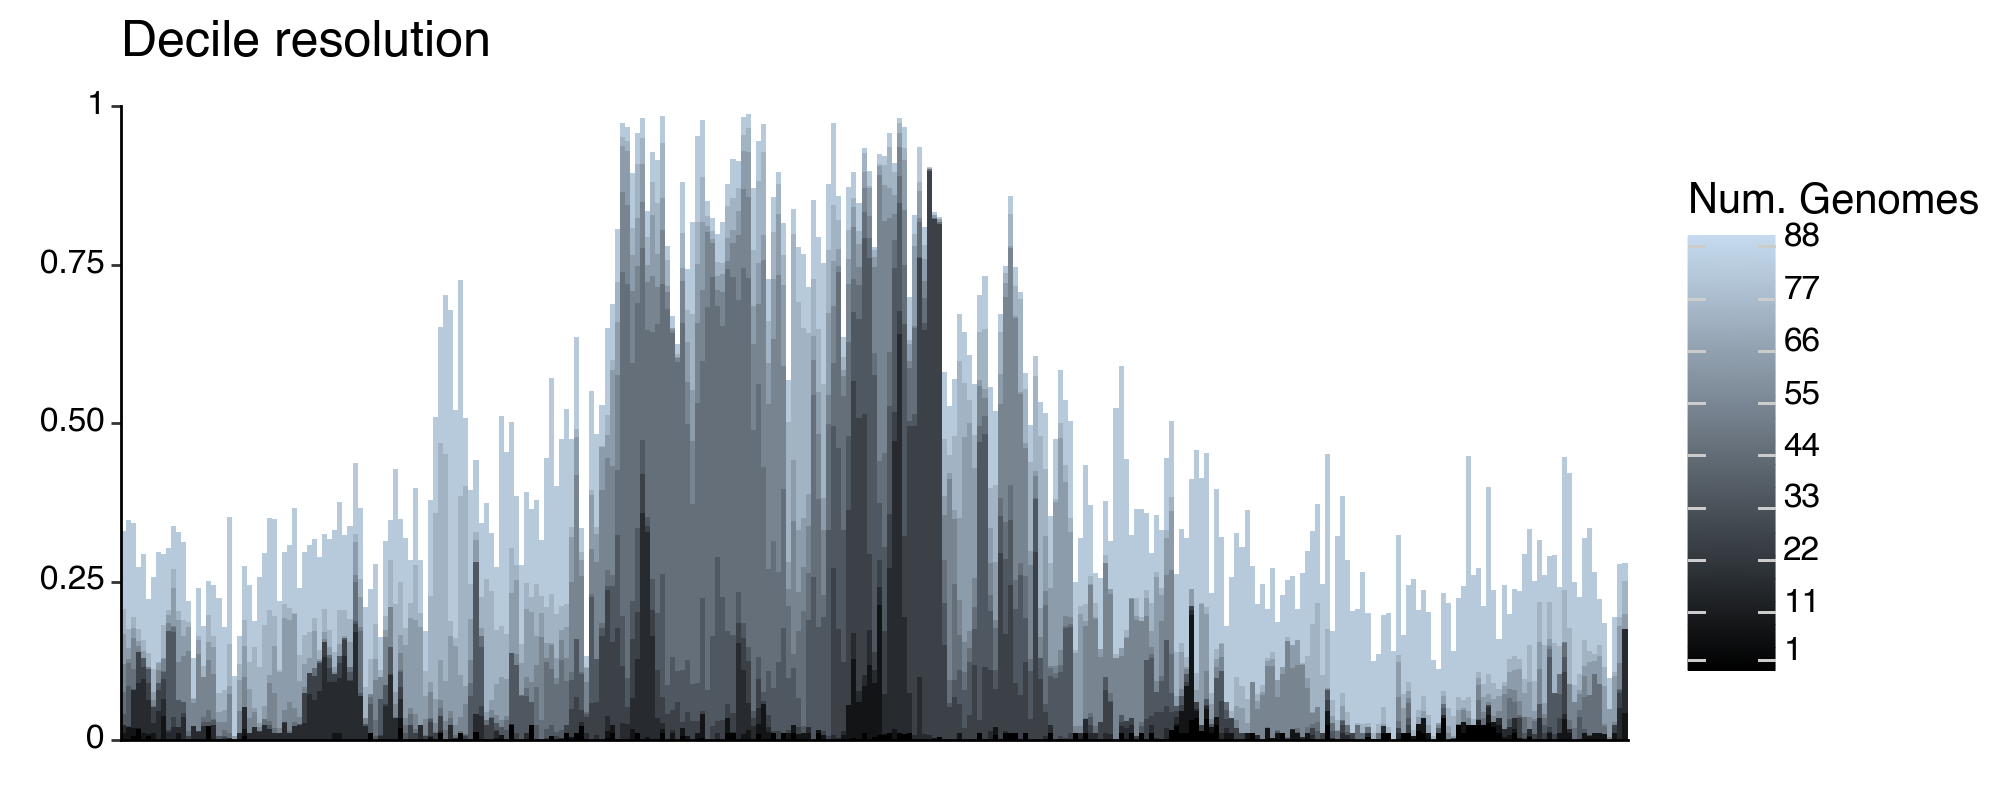

<Figure Size: (1000 x 400)>

In [12]:
################### DECILES ###################
path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/tmp/memo_hla_subset_conservation.deciles.bed'
n_bins = 300
num_docs = 89
data = panagram_preprocess(path, num_docs, n_bins)

#breaks = [1, 9, 18, 27, 36, 45, 54, 63, 72, 81] 
breaks = [1, 11, 22, 33, 44, 55, 66, 77, 88]


# plot MEM-version of Panagram
(
    ggplot(data, aes(x='bin', y='value', fill='Num. Genomes')) +
    geom_bar(stat="identity", width=1) +
    ggtitle("Decile resolution") +
    xlab("") +
    ylab("") +
    scale_x_continuous(
        breaks=[],
        labels=[],
        expand = (0,0)
    ) +
    scale_y_continuous(
        breaks=[0, 0.25, 0.50, 0.75, 1],
        labels=['0', '0.25','0.50','0.75', '1'],
        expand=(0,0),
        limits=(0,1)
    ) +
    scale_fill_gradient(low='#000000', high='#c6dbef',
                        breaks=breaks,
                        labels=breaks,
                        limits=(1,88)
                       ) +
    theme_tufte_func(base_size=15, rotate=False, figure_size=[10,4])
)
